# 2019 Coding Advent
<p> These problems are from the 2019 <a href="https://adventofcode.com/">Coding Advent Calendar</a>. Significant portions of the questions are copied here.</p> 

## Day 1: The Tyranny of the Rocket Equation

### Part 1
<p>"Fuel required to launch a given module is based on its mass. Specifically, to find the fuel required for a module, take its mass, divide by three, round down, and subtract 2."</p>

<p>"The Fuel Counter-Upper needs to know the total fuel requirement. To find it, individually calculate the fuel needed for the mass of each module (your puzzle input), then add together all the fuel values."</p>

### Part 2
<p>Fuel itself requires fuel just like a module - take its mass, divide by three, round down, and subtract 2. However, that fuel also requires fuel, and that fuel requires fuel, and so on. Any mass that would require negative fuel should instead be treated as if it requires zero fuel; the remaining mass, if any, is instead handled by wishing really hard, which has no mass and is outside the scope of this calculation.

So, for each module mass, calculate its fuel and add it to the total. Then, treat the fuel amount you just calculated as the input mass and repeat the process, continuing until a fuel requirement is zero or negative.</p>

In [18]:
def findfuel(mass):
    #use floor division opperator // to round down
    fuel = mass//3 - 2
    return fuel

print(findfuel(100756))

33583


In [22]:
#declare a file handler object to read the data from the data file
f = open("Data/day1.txt", "r")

#the file is in the form of a string of raw lines. format the data into a list by breaking the string on EOLs
values = f.read()
values = values.split("\n")

#add all module mass => fuel values together line by line (part 1)
sum = 0
for x in values:
    sum = sum + findfuel(int(x))
    #the fuel for the module is known, calculate fuel needed for that fuel, fuel needed for that additional fuel, and on until the adiidtional fuel is <=0.
    addedfuel = findfuel(findfuel(int(x)))
    while addedfuel > 0:
        sum = sum + addedfuel
        addedfuel = findfuel(addedfuel)


    
print("total fuel needed: " + str(sum))
f.close()

total fuel needed: 5115845


## Day 2

### Part 1 
<p>"An Intcode program is a list of integers separated by commas (like 1,0,0,3,99). To run one, start by looking at the first integer (called position 0). Here, you will find an opcode - either 1, 2, or 99. The opcode indicates what to do; for example, 99 means that the program is finished and should immediately halt. Encountering an unknown opcode means something went wrong.

Opcode 1 adds together numbers read from two positions and stores the result in a third position. The three integers immediately after the opcode tell you these three positions - the first two indicate the positions from which you should read the input values, and the third indicates the position at which the output should be stored.

For example, if your Intcode computer encounters 1,10,20,30, it should read the values at positions 10 and 20, add those values, and then overwrite the value at position 30 with their sum.

Opcode 2 works exactly like opcode 1, except it multiplies the two inputs instead of adding them. Again, the three integers after the opcode indicate where the inputs and outputs are, not their values.

Once you're done processing an opcode, move to the next one by stepping forward 4 positions.
    
Once you have a working computer, the first step is to restore the gravity assist program (your puzzle input) to the "1202 program alarm" state it had just before the last computer caught fire. To do this, before running the program, replace position 1 with the value 12 and replace position 2 with the value 2. What value is left at position 0 after the program halts?"</p>

### Part 2

To complete the gravity assist, you need to determine what pair of inputs produces the output 19690720.

The inputs should still be provided to the program by replacing the values at addresses 1 and 2, just like before. In this program, the value placed in address 1 is called the noun, and the value placed in address 2 is called the verb. Each of the two input values will be between 0 and 99, inclusive.

Once the program has halted, its output is available at address 0, also just like before. Each time you try a pair of inputs, make sure you first reset the computer's memory to the values in the program (your puzzle input) - in other words, don't reuse memory from a previous attempt.

Find the input noun and verb that cause the program to produce the output 19690720. What is 100 * noun + verb? (For example, if noun=12 and verb=2, the answer would be 1202.

In [52]:
#part 1
f = open("Data/day2.txt", "r")

data = f.read()

#declare a function to do list-ify the string of digits. also ensure that original data is not modified. Cast digits to be uniform
def sanatizestring(handler):
    originalprograms = handler.split(",")
    x = 0
    for i in originalprograms:
        originalprograms[x] = int(i)
        x = x + 1
    return originalprograms

def runcomputer(noun, verb, string):
    start = 0
    code = sanatizestring(string) #declare fresh data everytime the function is called. 
    code[1] = noun
    code[2] = verb
    while code[start] != 99:
        if code[start] == 1: #if opcode is 1, add the values found in location indexs factor1 and factor 2 and store in the index resultpos
            factor1 = code[start + 1]
            factor2 = code[start + 2]
            resultpos = code[start + 3]
            code[resultpos] = code[factor1] + code[factor2]
            start = start + 4 #move to the next intcode
        elif code[start] == 2:#if opcode is 2, multiply the values found in location indexs factor1 and factor 2 and store in the index resultpos
            factor1 = code[start + 1]
            factor2 = code[start + 2]
            resultpos = code[start + 3]
            code[resultpos] = code[factor1] * code[factor2]
            start = start + 4
        else:
            raise Exception("Invalid start code " + str(code[start])) #throw error if the digit in the opcode position is not known 
            break

    return code[0] #return the output of the program on the first index

print(runcomputer(12, 2, data))


5482655


In [55]:
#part 2
#loop through full ranges looking for the desired output and outputting the current state.

for i in range(0, 99):
    for x in range(0, 99):
        if runcomputer(i, x, data) == 19690720:
            errorcode = 100 * i + x
            print(f"Noun: {i}. Verb: {x}. error code {errorcode}")

f.close()

Noun: 49. Verb: 67. error code 4967


## Day 3: Crossed Wires

### Part 1

The wires twist and turn, but the two wires occasionally cross paths. To fix the circuit, you need to find the intersection point closest to the central port. Because the wires are on a grid, use the Manhattan distance for this measurement. While the wires do technically cross right at the central port where they both start, this point does not count, nor does a wire count as crossing with itself.

For example, if the first wire's path is R8,U5,L5,D3, then starting from the central port (o), it goes right 8, up 5, left 5, and finally down 3:

Then, if the second wire's path is U7,R6,D4,L4, it goes up 7, right 6, down 4, and left 4:

These wires cross at two locations (marked X), but the lower-left one is closer to the central port: its distance is 3 + 3 = 6.

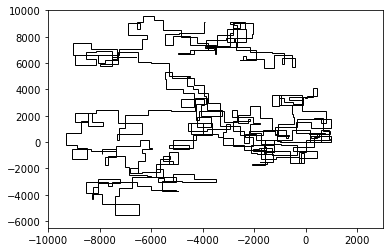

In [12]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

f = open("Data/day3.txt", "r")

data = f.read()
data = data.split("\n")
wire1 = data[0]
wire2 = data[1]

wire1 = wire1.split(",")
wire2 = wire2.split(",")

#lists of verticies in (x,y)
wire1verts = [(0,0)]
wire2verts = [(0,0)]

#map out the vertices by computing the changes caused by each instruction. R = add value to X, L = subtract from X, U = add to Y, D = subtract from Y
for i in wire1:
    lastvert = wire1verts[-1]
    if i.startswith("U"):
        distance = int(i[1:])
        point = (lastvert[0], lastvert[1] + distance)
        wire1verts.append(point)
    elif i.startswith("D"):
        distance = int(i[1:])
        point = (lastvert[0], lastvert[1] - distance)
        wire1verts.append(point)
    elif i.startswith("R"):
        distance = int(i[1:])
        point = (lastvert[0] + distance, lastvert[1])
        wire1verts.append(point)
    elif i.startswith("L"):
        distance = int(i[1:])
        point = (lastvert[0] - distance, lastvert[1])
        wire1verts.append(point)
        
for i in wire2:
    lastvert = wire2verts[-1]
    if i.startswith("U"):
        distance = int(i[1:])
        point = (lastvert[0], lastvert[1] + distance)
        wire2verts.append(point)
    elif i.startswith("D"):
        distance = int(i[1:])
        point = (lastvert[0], lastvert[1] - distance)
        wire2verts.append(point)
    elif i.startswith("R"):
        distance = int(i[1:])
        point = (lastvert[0] + distance, lastvert[1])
        wire2verts.append(point)
    elif i.startswith("L"):
        distance = int(i[1:])
        point = (lastvert[0] - distance, lastvert[1])
        wire2verts.append(point)
        
        
#draw a graph
path1 = Path(wire1verts)
path2 = Path(wire2verts)

fig, ax = plt.subplots()
patch1 = patches.PathPatch(path1, facecolor='none', lw=1)
patch2 = patches.PathPatch(path2, facecolor='none', lw=1)
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.set_xlim(-10000, 3000)
ax.set_ylim(-6500, 10000)
plt.show()

## Note

Please note that the above problem is not complete and is merely drawing a visulization of the appropriate data.

TODO:
1. Functionalize the while loops. 
2. find a way to find intersections that does not involve mapping out every single point each wire travels through and compairing the lists (~150000 total point on each wire, making for ~22 billion comparisons)